In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [57]:
from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf

In [58]:
for expression in os.listdir("C:/Users/Vinee/Desktop/Project/train/"):
    print(str(len(os.listdir("C:/Users/Vinee/Desktop/Project/train/"+expression))) + " " + expression)

3995 Angry
7215 Happy
4965 Neutral
4830 Sad
3171 Surprise


In [59]:
img_size = 48
batch_size = 64

In [60]:
datagen_train = ImageDataGenerator(horizontal_flip=True)

In [61]:
train_generator = datagen_train.flow_from_directory("C:/Users/Vinee/Desktop/Project/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 24176 images belonging to 5 classes.


In [62]:
datagen_validation = ImageDataGenerator(horizontal_flip=True)

In [63]:
validation_generator = datagen_validation.flow_from_directory("C:/Users/Vinee/Desktop/Project/test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 6043 images belonging to 5 classes.


In [64]:
model = Sequential()

In [65]:
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [66]:
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [67]:
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [68]:
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [69]:
model.add(Flatten())

In [70]:
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

In [71]:
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

In [84]:
model.add(Dense(5, activation='softmax'))

In [85]:
opt = Adam(lr=0.0005)

In [86]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 128)      

In [88]:
epochs = 15

In [89]:
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

In [90]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')

In [91]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

In [92]:
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

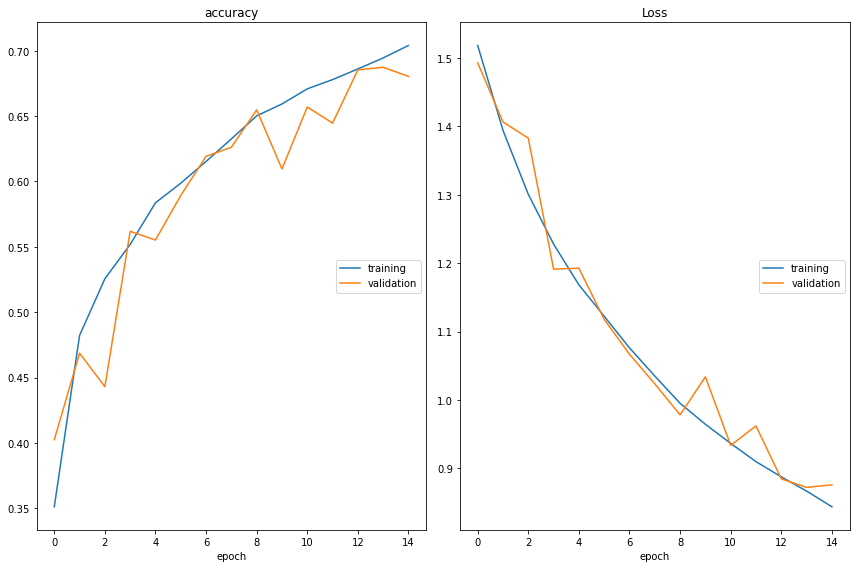

accuracy
	training         	 (min:    0.351, max:    0.704, cur:    0.704)
	validation       	 (min:    0.402, max:    0.687, cur:    0.680)
Loss
	training         	 (min:    0.844, max:    1.518, cur:    0.844)
	validation       	 (min:    0.872, max:    1.493, cur:    0.876)

Epoch 00015: saving model to model_weights.h5


In [93]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

In [97]:
model_json = model.to_json()

In [98]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)